In [30]:
import os
import numpy as np

# Step 1: Load and preprocess the dataset

def load_dataset(data_dir):
    dataset = []
    labels = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".txt"):
            with open(os.path.join(data_dir, filename), "r", encoding="utf-8") as file:
                text = file.read()
                # Extract the language label from the filename
                label = filename[0]
                if filename[1] != '1'  and filename[2] == '.':
                    dataset.append(text)
                    labels.append(label)
    return dataset, labels

data_dir = "./languageID/"
documents, labels = load_dataset(data_dir)


# Step 2: Calculate character frequencies for each language

def calculate_char_frequencies(documents, labels):
    char_frequencies = {}
    total_documents = len(documents)
    
    for i in range(total_documents):
        document = documents[i]
        label = labels[i]
        char_count = {}
        
        for char in document:
            if char.isalpha() or char == ' ':
                if char in char_count:
                    char_count[char] += 1
                else:
                    char_count[char] = 1
        
        if label in char_frequencies:
            for char, count in char_count.items():
                if char in char_frequencies[label]:
                    char_frequencies[label][char] += count
                else:
                    char_frequencies[label][char] = count
        else:
            char_frequencies[label] = char_count
    
    return char_frequencies

char_frequencies = calculate_char_frequencies(documents, labels)

# Step 3: Train the Naive Bayes classifier using character frequencies

def train_naive_bayes(char_frequencies):
    # Calculate total character counts for each language
    language_char_counts = {}
    for label, char_count in char_frequencies.items():
        total_chars = sum(char_count.values())
        language_char_counts[label] = total_chars
    
    # Calculate the prior probabilities for each language
    total_documents = len(documents)
    prior_probabilities = {}
    for label, char_count in char_frequencies.items():
        prior_probabilities[label] = len([l for l in labels if l == label]) / total_documents
    
    return char_frequencies, language_char_counts, prior_probabilities

char_frequencies, language_char_counts, prior_probabilities = train_naive_bayes(char_frequencies)

# Step 4: Classify new documents based on character frequencies

def classify_document(document, char_frequencies, language_char_counts, prior_probabilities):
    best_label = None
    best_log_prob = float("-inf")
    
    for label, char_count in char_frequencies.items():
        log_prob = np.log(prior_probabilities[label])
        
        for char in document:
            if char.isalpha() or char == ' ':
                if char in char_count:
                    char_prob = (char_count[char] + 0.5) / (language_char_counts[label] + 1.5)  # 27 characters in the vocabulary
                else:
                    char_prob = 0.5 / (language_char_counts[label] + 1.5)
                
                log_prob += np.log(char_prob)
        
        if log_prob > best_log_prob:
            best_log_prob = log_prob
            best_label = label
    
    return best_label

def load_test_dataset(data_dir):
    dataset = []
    labels = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".txt") and (filename[1] == '1' and filename[2] != '.'):
            with open(os.path.join(data_dir, filename), "r", encoding="utf-8") as file:
                text = file.read()
                # Extract the language label from the filename
                label = filename[0]
                # if filename[1] == 1:
                dataset.append(text)
                labels.append(label)
    return dataset, labels

# Example usage
test_document = """
Just testing
"""
print("Prior Probabilities = ", prior_probabilities)
test_docs, labels = load_test_dataset("./languageID/")
y_test_conf=labels[:]
print("Total Test documents =", len(test_docs))
err = 0
for i in range(len(test_docs)):
    predicted_language = classify_document(test_docs[i], char_frequencies, language_char_counts, prior_probabilities)
    # print(f"The document is classified as {predicted_language} language.", "Actual Language = ", labels[i])
    if predicted_language != labels[i]:
        err += 1
print("Correct Predictions =", len(test_docs) - err)
print("Errors = ", err)


Prior Probabilities =  {'e': 0.3333333333333333, 'j': 0.3333333333333333, 's': 0.3333333333333333}
Total Test documents = 30
Correct Predictions = 30
Errors =  0


#### Question 3.2

In [31]:
theta_e = []
for i in 'abcdefghijklmnopqrstuvwxyz ':
    theta_e.append((i, (char_frequencies['e'][i] + 0.5) / (1.5 + language_char_counts['e'])))
print("English- Class Conditional Probability = ")
# print(theta_e)

theta_english = {}
for i in theta_e:
    theta_english[i[0]] = i[1]
theta_english

English- Class Conditional Probability = 


{'a': 0.05946366109599689,
 'b': 0.011553545560541285,
 'c': 0.022294456418047556,
 'd': 0.02187047309472494,
 'e': 0.10504186835317811,
 'f': 0.019114581493127936,
 'g': 0.018125287072041835,
 'h': 0.047097480832420595,
 'i': 0.05564781118609335,
 'j': 0.0013072819135780658,
 'k': 0.003921845740734198,
 'l': 0.029431509027311592,
 'm': 0.020174539801434476,
 'n': 0.0588983499982334,
 'o': 0.06476345263752958,
 'p': 0.01706532876373529,
 'q': 0.000600643041373706,
 'r': 0.05352789456948027,
 's': 0.06561141928417483,
 't': 0.07953220506660072,
 'u': 0.026604953538494153,
 'v': 0.009504292831148642,
 'w': 0.0155107232448857,
 'x': 0.00123661802635763,
 'y': 0.013461470515493058,
 'z': 0.000600643041373706,
 ' ': 0.17888563049853373}

#### Question 3.3

In [32]:
theta_s = []
for i in 'abcdefghijklmnopqrstuvwxyz ':
    theta_s.append((i, (char_frequencies['s'][i] + 0.5) / (1.5 + language_char_counts['s'])))
print("Spanish - Class Conditional Probability = ")


theta_spanish = {}
for i in theta_s:
    theta_spanish[i[0]] = i[1]
theta_spanish

Spanish - Class Conditional Probability = 


{'a': 0.10569930661254862,
 'b': 0.008286825638423811,
 'c': 0.037104684593269065,
 'd': 0.03879587349906985,
 'e': 0.11354642313546423,
 'f': 0.008489768307119906,
 'g': 0.007475054963639438,
 'h': 0.004701505158126163,
 'i': 0.04982242516489092,
 'j': 0.006798579401319127,
 'k': 0.00030441400304414006,
 'l': 0.05340774564518857,
 'm': 0.025334009808895653,
 'n': 0.05408422120750888,
 'o': 0.0726196516150854,
 'p': 0.02445459157787925,
 'q': 0.007948587857263656,
 'r': 0.05902249281244715,
 's': 0.0654490106544901,
 't': 0.03588702858109251,
 'u': 0.033789954337899546,
 'v': 0.005851513614070692,
 'w': 0.00010147133434804668,
 'x': 0.0025367833587011668,
 'y': 0.007677997632335532,
 'z': 0.0028750211398613224,
 ' ': 0.16874682902080163}

In [33]:
theta_j = []
for i in 'abcdefghijklmnopqrstuvwxyz ':
    if i in char_frequencies['j']:
        theta_j.append((i, (char_frequencies['j'][i] + 0.5) / (1.5 + language_char_counts['j'])))
    else:
        theta_j.append((i, 0.5 / (13.5 + language_char_counts['j'])))
print("Japanese - Class Conditional Probability = ")


theta_japanese = {}
for i in theta_j:
    theta_japanese[i[0]] = i[1]
theta_japanese

Japanese - Class Conditional Probability = 


{'a': 0.13259992953059546,
 'b': 0.011157655717809184,
 'c': 0.0051286066632736955,
 'd': 0.017734800140938808,
 'e': 0.060016442861057825,
 'f': 0.003954116587714834,
 'g': 0.014211329914262225,
 'h': 0.03151548369416279,
 'i': 0.09720862858708844,
 'j': 0.002231531143561837,
 'k': 0.058763653447128375,
 'l': 0.0016051364365971107,
 'm': 0.03887562150099832,
 'n': 0.0568061699878636,
 'o': 0.09172767490114708,
 'p': 0.000822143052891203,
 'q': 0.00011744900755588615,
 'r': 0.04145949966722781,
 's': 0.04247739106604549,
 't': 0.056962768664604785,
 'u': 0.06988215949575226,
 'v': 0.0002740476842970677,
 'w': 0.01992718161531535,
 'x': 3.9112918997144755e-05,
 'y': 0.01389813256077986,
 'z': 0.007790784167873781,
 ' ': 0.12375210429471871}

#### Question 3.4

In [34]:
def create_bow_vector(filename):
    # Initialize a vector of size 27 with zeros
    bow_vector = {ch: 0 for ch in 'abcdefghijklmnopqrstuvwxyz '}
    
    with open(filename, "r", encoding="utf-8") as file:
        content = file.read().lower()
        # Count each character and update the bow_vector
        for ch in content:
            if ch in bow_vector:
                bow_vector[ch] += 1
    
    return bow_vector

# Main execution
filename = "./languageID/e10.txt"
bow_vector = create_bow_vector(filename)

print("Bag-of-Words Count Vector for e10.txt:")
for ch, count in bow_vector.items():
    print(f"{ch}: {count}")


Bag-of-Words Count Vector for e10.txt:
a: 164
b: 32
c: 53
d: 57
e: 311
f: 55
g: 51
h: 140
i: 140
j: 3
k: 6
l: 85
m: 64
n: 139
o: 182
p: 53
q: 3
r: 141
s: 186
t: 225
u: 65
v: 31
w: 47
x: 4
y: 38
z: 2
 : 498


#### Question 3.5 and 3.6

In [35]:
import math

def compute_log_likelihood(bow_vector, theta):
    log_likelihood = 0
    for ch, count in bow_vector.items():
        # Using log to get the log likelihood
        log_likelihood += count * math.log(theta[ch])
    return log_likelihood

# Compute log-likelihoods
log_likelihood_e = compute_log_likelihood(bow_vector, theta_english)
log_likelihood_j = compute_log_likelihood(bow_vector, theta_japanese)
log_likelihood_s = compute_log_likelihood(bow_vector, theta_spanish)

# Compute log posteriors
log_posterior_e = log_likelihood_e + math.log(prior_probabilities['e'])
log_posterior_j = log_likelihood_j + math.log(prior_probabilities['j'])
log_posterior_s = log_likelihood_s + math.log(prior_probabilities['s'])

print("Log Likelihood for English:", log_likelihood_e)
print("Log Likelihood for Japanese:", log_likelihood_j)
print("Log Likelihood for Spanish:", log_likelihood_s)

import decimal
temp1 = pow(decimal.Decimal(math.exp(1)),decimal.Decimal(log_likelihood_e))
temp2 = pow(decimal.Decimal(math.exp(1)),decimal.Decimal(log_likelihood_j))
temp3 = pow(decimal.Decimal(math.exp(1)),decimal.Decimal(log_likelihood_s))

print("Likelihood for English:", temp1)
print("Likelihood for Japanese:", temp2)
print("Likelihood for Spanish:", temp3)

print("Log Posterior for English:", log_posterior_e)
print("Log Posterior for Japanese:", log_posterior_j)
print("Log Posterior for Spanish:", log_posterior_s)

import decimal
temp1 = pow(decimal.Decimal(math.exp(1)),decimal.Decimal(log_posterior_e))
temp2 = pow(decimal.Decimal(math.exp(1)),decimal.Decimal(log_posterior_s))
temp3 = pow(decimal.Decimal(math.exp(1)),decimal.Decimal(log_posterior_j))

print("Posterior for English: ", temp1)
print("Posterior for Spanish: ", temp2)
print("Posterior for Japanese: ", temp3)

# Predict the class label based on max log-posterior
predicted_language = max(("English", log_posterior_e), ("Japanese", log_posterior_j), ("Spanish", log_posterior_s), key=lambda x: x[1])[0]
print("Predicted class label:", predicted_language)


Log Likelihood for English: -7840.032136631908
Log Likelihood for Japanese: -8763.842626863328
Log Likelihood for Spanish: -8455.713565886454
Likelihood for English: 1.310102021015336235094476936E-3405
Likelihood for Japanese: 8.156557174082387570705576301E-3807
Likelihood for Spanish: 5.373506530835482387951004136E-3673
Log Posterior for English: -7841.130748920576
Log Posterior for Japanese: -8764.941239151996
Log Posterior for Spanish: -8456.812178175122
Posterior for English:  4.367006736718542682473498549E-3406
Posterior for Spanish:  1.791168843612137228216016146E-3673
Posterior for Japanese:  2.718852391361266056488021686E-3807
Predicted class label: English


#### Confusion matrix

30it [00:00, ?it/s]

[10, 0, 0]
[0, 10, 0]
[0, 0, 10]


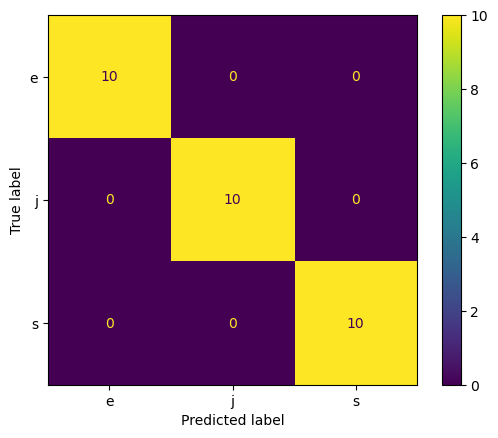

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm

# Sample data (you'd replace this with your actual file loading mechanism)
documents = ["sampleEnglishText1", "sampleSpanishText1", "sampleJapaneseText1"]
labels = ["e", "s", "j"]

# Convert documents to character frequency vectors
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
X = vectorizer.fit_transform(documents)
y = labels

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on the testing data
y_pred = []
for i in range(len(test_docs)):
    predicted_language = classify_document(test_docs[i], char_frequencies, language_char_counts, prior_probabilities)
    y_pred.append(predicted_language)
y_pred = np.asarray(y_pred)

confusion = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
label_idx = {"e": 0, "s": 1, "j": 2}
for true, pred in tqdm(zip(y_test_conf, y_pred)):
    confusion[label_idx[true]][label_idx[pred]] += 1
for row in confusion:
    print(row)

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test_conf,y_pred)
# disp.plot()


# Question 4

#### Forward Pass

1. $z = W_1x$
2. $a = \sigma(z)$
3. $h = W_2a$
4. $\hat{y} = g(h)$

#### Loss 
- $L(x,y) = - \sum_{i=1}^k y_i log(g(j))$

#### Backpropagation and gradients of $W_1$ and $W_2$
- $\partial W_2 = \frac{\partial L}{\partial h} \cdot a^T$
- $\partial W_1 = \partial W_2 \cdot \sigma'(z) \cdot x^T$

### Define the functions for ANN

In [12]:
import numpy as np

# Helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum(axis=0)

# Define the feedforward and backpropagation functions
def feedforward(x, W1, W2):
    # z = np.dot(W1, x)
    z = W1 @ x
    a = sigmoid(z)
    # h = np.dot(W2, a)
    h = W2 @ a
    y_pred = softmax(h)
    # print(x.shape, W1.shape, W2.shape)
    return z, a, h, y_pred

def backpropagation(x, y, y_pred, W2, z, a):
    m = x.shape[1]
    
    dh = y_pred - y
    dW2 = 1/m * np.dot(dh, a.T)
    dz = np.dot(W2.T, dh) * sigmoid_derivative(z)
    dW1 = 1/m * np.dot(dz, x.T)
    
    return dW1, dW2

# Training the model
def train_model(X, Y, learning_rate, epochs):
    np.random.seed(42)
    W1 = np.random.randn(200, 300)
    W2 = np.random.randn(10, 200)
    
    for epoch in range(epochs):
        for x, y in zip(X, Y):
            z, a, h, y_pred = feedforward(x, W1, W2)
            dW1, dW2 = backpropagation(x, y, y_pred, W2, z, a)
            
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
            
    return W1, W2


### MNIST Dataset
- Load dataset (_Used Tensorflow to download the dataset_)
- Encode the labels using one-hot encoding

In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



# Flatten the images and normalize
train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

train_labels = one_hot_encode(train_labels, 10)
test_labels = one_hot_encode(test_labels, 10)


### Training the model

In [15]:
# Hyperparameters
from tqdm import tqdm
learning_rate = 0.01
epochs = 200
batch_size = 32
d1 = 300

# Weight initalization with weights = 0
# W1 = np.zeros((hidden_units, 784))
# W2 = np.zeros((10, hidden_units))

# Weight Initialization with +1 to -1
W1 = np.random.rand(d1, 784)
W2 = np.random.rand(10, d1)

W1 = 2 * W1 - 1
W2 = 2 * W2 - 1

train_loss_array = []
train_acc_array = []
test_loss_array = []
test_acc_array = []

for epoch in range(epochs):
    # Shuffle the dataset
    permutation = np.random.permutation(train_images.shape[0])
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]
    
    for i in tqdm(range(0, train_images.shape[0], batch_size)):
        x_batch = train_images[i:i+batch_size]
        y_batch = train_labels[i:i+batch_size]
        
        z, a, h, y_pred = feedforward(x_batch.T, W1, W2)
        dW1, dW2 = backpropagation(x_batch.T, y_batch.T, y_pred, W2, z, a)
        
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
        
    # Calculate training loss and accuracy after each epoch
    _, _, _, y_train_pred = feedforward(train_images.T, W1, W2)
    _, _, _, y_test_pred = feedforward(test_images.T, W1, W2)
    train_loss = -np.mean(np.sum(train_labels * np.log(y_train_pred.T), axis=1))
    train_acc = np.mean(np.argmax(y_train_pred, axis=0) == np.argmax(train_labels, axis=1))
    test_loss = -np.mean(np.sum(test_labels * np.log(y_test_pred.T), axis=1))
    test_acc = np.mean(np.argmax(y_test_pred, axis=0) == np.argmax(test_labels, axis=1))
    
    train_loss_array.append(train_loss)
    train_acc_array.append(train_acc)
    test_loss_array.append(test_loss)
    test_acc_array.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


100%|██████████| 1875/1875 [00:06<00:00, 285.39it/s]


Epoch 1/200, Train Loss: 0.8901, Train Accuracy: 0.7484, Test Loss: 0.8813, Test Accuracy: 0.7556


100%|██████████| 1875/1875 [00:06<00:00, 307.87it/s]


Epoch 2/200, Train Loss: 0.6458, Train Accuracy: 0.8153, Test Loss: 0.6455, Test Accuracy: 0.8176


100%|██████████| 1875/1875 [00:05<00:00, 316.02it/s]


Epoch 3/200, Train Loss: 0.5433, Train Accuracy: 0.8442, Test Loss: 0.5458, Test Accuracy: 0.8456


100%|██████████| 1875/1875 [00:06<00:00, 278.37it/s]


Epoch 4/200, Train Loss: 0.4841, Train Accuracy: 0.8604, Test Loss: 0.4889, Test Accuracy: 0.8604


100%|██████████| 1875/1875 [00:06<00:00, 309.26it/s]


Epoch 5/200, Train Loss: 0.4431, Train Accuracy: 0.8713, Test Loss: 0.4508, Test Accuracy: 0.8691


100%|██████████| 1875/1875 [00:06<00:00, 311.20it/s]


Epoch 6/200, Train Loss: 0.4121, Train Accuracy: 0.8790, Test Loss: 0.4220, Test Accuracy: 0.8775


100%|██████████| 1875/1875 [00:05<00:00, 331.59it/s]


Epoch 7/200, Train Loss: 0.3877, Train Accuracy: 0.8864, Test Loss: 0.4011, Test Accuracy: 0.8834


100%|██████████| 1875/1875 [00:05<00:00, 329.99it/s]


Epoch 8/200, Train Loss: 0.3683, Train Accuracy: 0.8919, Test Loss: 0.3842, Test Accuracy: 0.8876


100%|██████████| 1875/1875 [00:05<00:00, 334.57it/s]


Epoch 9/200, Train Loss: 0.3508, Train Accuracy: 0.8972, Test Loss: 0.3666, Test Accuracy: 0.8922


100%|██████████| 1875/1875 [00:05<00:00, 330.80it/s]


Epoch 10/200, Train Loss: 0.3350, Train Accuracy: 0.9014, Test Loss: 0.3524, Test Accuracy: 0.8967


100%|██████████| 1875/1875 [00:05<00:00, 329.81it/s]


Epoch 11/200, Train Loss: 0.3226, Train Accuracy: 0.9047, Test Loss: 0.3428, Test Accuracy: 0.8981


100%|██████████| 1875/1875 [00:05<00:00, 331.39it/s]


Epoch 12/200, Train Loss: 0.3117, Train Accuracy: 0.9076, Test Loss: 0.3326, Test Accuracy: 0.9025


100%|██████████| 1875/1875 [00:05<00:00, 333.00it/s]


Epoch 13/200, Train Loss: 0.3004, Train Accuracy: 0.9108, Test Loss: 0.3217, Test Accuracy: 0.9043


100%|██████████| 1875/1875 [00:05<00:00, 331.05it/s]


Epoch 14/200, Train Loss: 0.2911, Train Accuracy: 0.9136, Test Loss: 0.3143, Test Accuracy: 0.9070


100%|██████████| 1875/1875 [00:05<00:00, 328.47it/s]


Epoch 15/200, Train Loss: 0.2832, Train Accuracy: 0.9163, Test Loss: 0.3071, Test Accuracy: 0.9085


100%|██████████| 1875/1875 [00:05<00:00, 330.39it/s]


Epoch 16/200, Train Loss: 0.2744, Train Accuracy: 0.9186, Test Loss: 0.3002, Test Accuracy: 0.9115


100%|██████████| 1875/1875 [00:05<00:00, 332.36it/s]


Epoch 17/200, Train Loss: 0.2684, Train Accuracy: 0.9204, Test Loss: 0.2949, Test Accuracy: 0.9135


100%|██████████| 1875/1875 [00:05<00:00, 332.51it/s]


Epoch 18/200, Train Loss: 0.2609, Train Accuracy: 0.9228, Test Loss: 0.2889, Test Accuracy: 0.9140


100%|██████████| 1875/1875 [00:05<00:00, 329.87it/s]


Epoch 19/200, Train Loss: 0.2547, Train Accuracy: 0.9245, Test Loss: 0.2839, Test Accuracy: 0.9155


100%|██████████| 1875/1875 [00:05<00:00, 324.28it/s]


Epoch 20/200, Train Loss: 0.2486, Train Accuracy: 0.9267, Test Loss: 0.2794, Test Accuracy: 0.9178


100%|██████████| 1875/1875 [00:05<00:00, 316.78it/s]


Epoch 21/200, Train Loss: 0.2429, Train Accuracy: 0.9279, Test Loss: 0.2742, Test Accuracy: 0.9187


100%|██████████| 1875/1875 [00:05<00:00, 330.08it/s]


Epoch 22/200, Train Loss: 0.2380, Train Accuracy: 0.9297, Test Loss: 0.2699, Test Accuracy: 0.9196


100%|██████████| 1875/1875 [00:05<00:00, 327.02it/s]


Epoch 23/200, Train Loss: 0.2341, Train Accuracy: 0.9308, Test Loss: 0.2671, Test Accuracy: 0.9207


100%|██████████| 1875/1875 [00:05<00:00, 327.49it/s]


Epoch 24/200, Train Loss: 0.2306, Train Accuracy: 0.9314, Test Loss: 0.2639, Test Accuracy: 0.9209


100%|██████████| 1875/1875 [00:05<00:00, 325.91it/s]


Epoch 25/200, Train Loss: 0.2251, Train Accuracy: 0.9336, Test Loss: 0.2599, Test Accuracy: 0.9228


100%|██████████| 1875/1875 [00:05<00:00, 328.70it/s]


Epoch 26/200, Train Loss: 0.2210, Train Accuracy: 0.9346, Test Loss: 0.2564, Test Accuracy: 0.9227


100%|██████████| 1875/1875 [00:05<00:00, 326.43it/s]


Epoch 27/200, Train Loss: 0.2173, Train Accuracy: 0.9355, Test Loss: 0.2531, Test Accuracy: 0.9244


100%|██████████| 1875/1875 [00:05<00:00, 329.88it/s]


Epoch 28/200, Train Loss: 0.2132, Train Accuracy: 0.9367, Test Loss: 0.2504, Test Accuracy: 0.9240


100%|██████████| 1875/1875 [00:05<00:00, 325.76it/s]


Epoch 29/200, Train Loss: 0.2093, Train Accuracy: 0.9380, Test Loss: 0.2467, Test Accuracy: 0.9262


100%|██████████| 1875/1875 [00:05<00:00, 331.14it/s]


Epoch 30/200, Train Loss: 0.2067, Train Accuracy: 0.9387, Test Loss: 0.2453, Test Accuracy: 0.9263


100%|██████████| 1875/1875 [00:05<00:00, 327.76it/s]


Epoch 31/200, Train Loss: 0.2037, Train Accuracy: 0.9396, Test Loss: 0.2426, Test Accuracy: 0.9282


100%|██████████| 1875/1875 [00:05<00:00, 327.97it/s]


Epoch 32/200, Train Loss: 0.2000, Train Accuracy: 0.9409, Test Loss: 0.2393, Test Accuracy: 0.9279


100%|██████████| 1875/1875 [00:05<00:00, 329.79it/s]


Epoch 33/200, Train Loss: 0.1975, Train Accuracy: 0.9416, Test Loss: 0.2381, Test Accuracy: 0.9290


100%|██████████| 1875/1875 [00:06<00:00, 291.90it/s]


Epoch 34/200, Train Loss: 0.1941, Train Accuracy: 0.9426, Test Loss: 0.2349, Test Accuracy: 0.9298


100%|██████████| 1875/1875 [00:07<00:00, 265.82it/s]


Epoch 35/200, Train Loss: 0.1916, Train Accuracy: 0.9433, Test Loss: 0.2328, Test Accuracy: 0.9296


100%|██████████| 1875/1875 [00:06<00:00, 276.00it/s]


Epoch 36/200, Train Loss: 0.1886, Train Accuracy: 0.9449, Test Loss: 0.2300, Test Accuracy: 0.9315


100%|██████████| 1875/1875 [00:06<00:00, 306.36it/s]


Epoch 37/200, Train Loss: 0.1868, Train Accuracy: 0.9453, Test Loss: 0.2287, Test Accuracy: 0.9316


100%|██████████| 1875/1875 [00:05<00:00, 329.67it/s]


Epoch 38/200, Train Loss: 0.1840, Train Accuracy: 0.9458, Test Loss: 0.2258, Test Accuracy: 0.9316


100%|██████████| 1875/1875 [00:06<00:00, 299.05it/s]


Epoch 39/200, Train Loss: 0.1814, Train Accuracy: 0.9465, Test Loss: 0.2240, Test Accuracy: 0.9330


100%|██████████| 1875/1875 [00:05<00:00, 331.78it/s]


Epoch 40/200, Train Loss: 0.1788, Train Accuracy: 0.9472, Test Loss: 0.2220, Test Accuracy: 0.9338


100%|██████████| 1875/1875 [00:05<00:00, 327.66it/s]


Epoch 41/200, Train Loss: 0.1769, Train Accuracy: 0.9476, Test Loss: 0.2211, Test Accuracy: 0.9334


100%|██████████| 1875/1875 [00:05<00:00, 330.36it/s]


Epoch 42/200, Train Loss: 0.1750, Train Accuracy: 0.9487, Test Loss: 0.2197, Test Accuracy: 0.9345


100%|██████████| 1875/1875 [00:05<00:00, 323.26it/s]


Epoch 43/200, Train Loss: 0.1730, Train Accuracy: 0.9485, Test Loss: 0.2181, Test Accuracy: 0.9352


100%|██████████| 1875/1875 [00:05<00:00, 330.39it/s]


Epoch 44/200, Train Loss: 0.1708, Train Accuracy: 0.9498, Test Loss: 0.2159, Test Accuracy: 0.9346


100%|██████████| 1875/1875 [00:05<00:00, 324.55it/s]


Epoch 45/200, Train Loss: 0.1689, Train Accuracy: 0.9503, Test Loss: 0.2138, Test Accuracy: 0.9356


100%|██████████| 1875/1875 [00:05<00:00, 329.75it/s]


Epoch 46/200, Train Loss: 0.1665, Train Accuracy: 0.9509, Test Loss: 0.2125, Test Accuracy: 0.9353


100%|██████████| 1875/1875 [00:05<00:00, 328.27it/s]


Epoch 47/200, Train Loss: 0.1654, Train Accuracy: 0.9510, Test Loss: 0.2122, Test Accuracy: 0.9356


100%|██████████| 1875/1875 [00:05<00:00, 330.65it/s]


Epoch 48/200, Train Loss: 0.1629, Train Accuracy: 0.9519, Test Loss: 0.2101, Test Accuracy: 0.9370


100%|██████████| 1875/1875 [00:05<00:00, 331.55it/s]


Epoch 49/200, Train Loss: 0.1619, Train Accuracy: 0.9526, Test Loss: 0.2091, Test Accuracy: 0.9369


100%|██████████| 1875/1875 [00:05<00:00, 329.89it/s]


Epoch 50/200, Train Loss: 0.1595, Train Accuracy: 0.9534, Test Loss: 0.2075, Test Accuracy: 0.9378


100%|██████████| 1875/1875 [00:05<00:00, 333.68it/s]


Epoch 51/200, Train Loss: 0.1580, Train Accuracy: 0.9537, Test Loss: 0.2065, Test Accuracy: 0.9372


100%|██████████| 1875/1875 [00:05<00:00, 332.50it/s]


Epoch 52/200, Train Loss: 0.1563, Train Accuracy: 0.9541, Test Loss: 0.2051, Test Accuracy: 0.9381


100%|██████████| 1875/1875 [00:05<00:00, 330.54it/s]


Epoch 53/200, Train Loss: 0.1545, Train Accuracy: 0.9550, Test Loss: 0.2027, Test Accuracy: 0.9386


100%|██████████| 1875/1875 [00:05<00:00, 334.61it/s]


Epoch 54/200, Train Loss: 0.1531, Train Accuracy: 0.9553, Test Loss: 0.2017, Test Accuracy: 0.9387


100%|██████████| 1875/1875 [00:05<00:00, 334.57it/s]


Epoch 55/200, Train Loss: 0.1513, Train Accuracy: 0.9559, Test Loss: 0.2003, Test Accuracy: 0.9392


100%|██████████| 1875/1875 [00:05<00:00, 333.96it/s]


Epoch 56/200, Train Loss: 0.1500, Train Accuracy: 0.9561, Test Loss: 0.1996, Test Accuracy: 0.9395


100%|██████████| 1875/1875 [00:05<00:00, 332.88it/s]


Epoch 57/200, Train Loss: 0.1481, Train Accuracy: 0.9569, Test Loss: 0.1988, Test Accuracy: 0.9400


100%|██████████| 1875/1875 [00:05<00:00, 327.85it/s]


Epoch 58/200, Train Loss: 0.1468, Train Accuracy: 0.9573, Test Loss: 0.1973, Test Accuracy: 0.9402


100%|██████████| 1875/1875 [00:05<00:00, 334.82it/s]


Epoch 59/200, Train Loss: 0.1460, Train Accuracy: 0.9576, Test Loss: 0.1963, Test Accuracy: 0.9392


100%|██████████| 1875/1875 [00:05<00:00, 330.99it/s]


Epoch 60/200, Train Loss: 0.1441, Train Accuracy: 0.9579, Test Loss: 0.1951, Test Accuracy: 0.9407


100%|██████████| 1875/1875 [00:05<00:00, 334.39it/s]


Epoch 61/200, Train Loss: 0.1431, Train Accuracy: 0.9586, Test Loss: 0.1952, Test Accuracy: 0.9417


100%|██████████| 1875/1875 [00:05<00:00, 330.61it/s]


Epoch 62/200, Train Loss: 0.1416, Train Accuracy: 0.9591, Test Loss: 0.1929, Test Accuracy: 0.9419


100%|██████████| 1875/1875 [00:05<00:00, 332.37it/s]


Epoch 63/200, Train Loss: 0.1407, Train Accuracy: 0.9596, Test Loss: 0.1931, Test Accuracy: 0.9419


100%|██████████| 1875/1875 [00:05<00:00, 333.47it/s]


Epoch 64/200, Train Loss: 0.1386, Train Accuracy: 0.9600, Test Loss: 0.1909, Test Accuracy: 0.9415


100%|██████████| 1875/1875 [00:05<00:00, 331.82it/s]


Epoch 65/200, Train Loss: 0.1380, Train Accuracy: 0.9602, Test Loss: 0.1910, Test Accuracy: 0.9417


100%|██████████| 1875/1875 [00:05<00:00, 323.02it/s]


Epoch 66/200, Train Loss: 0.1365, Train Accuracy: 0.9606, Test Loss: 0.1892, Test Accuracy: 0.9427


100%|██████████| 1875/1875 [00:05<00:00, 328.99it/s]


Epoch 67/200, Train Loss: 0.1358, Train Accuracy: 0.9610, Test Loss: 0.1889, Test Accuracy: 0.9430


100%|██████████| 1875/1875 [00:05<00:00, 330.40it/s]


Epoch 68/200, Train Loss: 0.1339, Train Accuracy: 0.9613, Test Loss: 0.1876, Test Accuracy: 0.9428


100%|██████████| 1875/1875 [00:05<00:00, 333.91it/s]


Epoch 69/200, Train Loss: 0.1327, Train Accuracy: 0.9615, Test Loss: 0.1865, Test Accuracy: 0.9433


100%|██████████| 1875/1875 [00:05<00:00, 332.71it/s]


Epoch 70/200, Train Loss: 0.1321, Train Accuracy: 0.9618, Test Loss: 0.1867, Test Accuracy: 0.9422


100%|██████████| 1875/1875 [00:05<00:00, 332.40it/s]


Epoch 71/200, Train Loss: 0.1308, Train Accuracy: 0.9623, Test Loss: 0.1856, Test Accuracy: 0.9441


100%|██████████| 1875/1875 [00:05<00:00, 332.81it/s]


Epoch 72/200, Train Loss: 0.1295, Train Accuracy: 0.9627, Test Loss: 0.1836, Test Accuracy: 0.9444


100%|██████████| 1875/1875 [00:05<00:00, 327.77it/s]


Epoch 73/200, Train Loss: 0.1289, Train Accuracy: 0.9629, Test Loss: 0.1844, Test Accuracy: 0.9433


100%|██████████| 1875/1875 [00:05<00:00, 330.87it/s]


Epoch 74/200, Train Loss: 0.1275, Train Accuracy: 0.9634, Test Loss: 0.1824, Test Accuracy: 0.9452


100%|██████████| 1875/1875 [00:05<00:00, 331.76it/s]


Epoch 75/200, Train Loss: 0.1265, Train Accuracy: 0.9636, Test Loss: 0.1815, Test Accuracy: 0.9448


100%|██████████| 1875/1875 [00:05<00:00, 327.41it/s]


Epoch 76/200, Train Loss: 0.1251, Train Accuracy: 0.9641, Test Loss: 0.1808, Test Accuracy: 0.9451


100%|██████████| 1875/1875 [00:05<00:00, 334.53it/s]


Epoch 77/200, Train Loss: 0.1243, Train Accuracy: 0.9645, Test Loss: 0.1809, Test Accuracy: 0.9448


100%|██████████| 1875/1875 [00:05<00:00, 332.87it/s]


Epoch 78/200, Train Loss: 0.1238, Train Accuracy: 0.9643, Test Loss: 0.1796, Test Accuracy: 0.9459


100%|██████████| 1875/1875 [00:05<00:00, 332.69it/s]


Epoch 79/200, Train Loss: 0.1227, Train Accuracy: 0.9652, Test Loss: 0.1794, Test Accuracy: 0.9453


100%|██████████| 1875/1875 [00:05<00:00, 332.23it/s]


Epoch 80/200, Train Loss: 0.1216, Train Accuracy: 0.9652, Test Loss: 0.1785, Test Accuracy: 0.9460


100%|██████████| 1875/1875 [00:05<00:00, 327.28it/s]


Epoch 81/200, Train Loss: 0.1207, Train Accuracy: 0.9654, Test Loss: 0.1777, Test Accuracy: 0.9446


100%|██████████| 1875/1875 [00:05<00:00, 330.53it/s]


Epoch 82/200, Train Loss: 0.1206, Train Accuracy: 0.9657, Test Loss: 0.1782, Test Accuracy: 0.9461


100%|██████████| 1875/1875 [00:05<00:00, 331.68it/s]


Epoch 83/200, Train Loss: 0.1185, Train Accuracy: 0.9666, Test Loss: 0.1759, Test Accuracy: 0.9472


100%|██████████| 1875/1875 [00:05<00:00, 338.62it/s]


Epoch 84/200, Train Loss: 0.1175, Train Accuracy: 0.9669, Test Loss: 0.1756, Test Accuracy: 0.9467


100%|██████████| 1875/1875 [00:05<00:00, 331.80it/s]


Epoch 85/200, Train Loss: 0.1169, Train Accuracy: 0.9668, Test Loss: 0.1744, Test Accuracy: 0.9470


100%|██████████| 1875/1875 [00:05<00:00, 330.42it/s]


Epoch 86/200, Train Loss: 0.1159, Train Accuracy: 0.9672, Test Loss: 0.1737, Test Accuracy: 0.9472


100%|██████████| 1875/1875 [00:05<00:00, 327.76it/s]


Epoch 87/200, Train Loss: 0.1151, Train Accuracy: 0.9675, Test Loss: 0.1740, Test Accuracy: 0.9471


100%|██████████| 1875/1875 [00:05<00:00, 334.97it/s]


Epoch 88/200, Train Loss: 0.1142, Train Accuracy: 0.9679, Test Loss: 0.1730, Test Accuracy: 0.9476


100%|██████████| 1875/1875 [00:05<00:00, 331.52it/s]


Epoch 89/200, Train Loss: 0.1133, Train Accuracy: 0.9681, Test Loss: 0.1716, Test Accuracy: 0.9479


100%|██████████| 1875/1875 [00:05<00:00, 331.36it/s]


Epoch 90/200, Train Loss: 0.1127, Train Accuracy: 0.9684, Test Loss: 0.1710, Test Accuracy: 0.9478


100%|██████████| 1875/1875 [00:05<00:00, 332.03it/s]


Epoch 91/200, Train Loss: 0.1117, Train Accuracy: 0.9686, Test Loss: 0.1710, Test Accuracy: 0.9478


100%|██████████| 1875/1875 [00:05<00:00, 330.90it/s]


Epoch 92/200, Train Loss: 0.1108, Train Accuracy: 0.9693, Test Loss: 0.1704, Test Accuracy: 0.9480


100%|██████████| 1875/1875 [00:05<00:00, 329.30it/s]


Epoch 93/200, Train Loss: 0.1103, Train Accuracy: 0.9689, Test Loss: 0.1699, Test Accuracy: 0.9482


100%|██████████| 1875/1875 [00:05<00:00, 334.43it/s]


Epoch 94/200, Train Loss: 0.1092, Train Accuracy: 0.9696, Test Loss: 0.1693, Test Accuracy: 0.9483


100%|██████████| 1875/1875 [00:05<00:00, 331.67it/s]


Epoch 95/200, Train Loss: 0.1085, Train Accuracy: 0.9694, Test Loss: 0.1687, Test Accuracy: 0.9489


100%|██████████| 1875/1875 [00:05<00:00, 332.27it/s]


Epoch 96/200, Train Loss: 0.1078, Train Accuracy: 0.9699, Test Loss: 0.1679, Test Accuracy: 0.9487


100%|██████████| 1875/1875 [00:05<00:00, 335.46it/s]


Epoch 97/200, Train Loss: 0.1071, Train Accuracy: 0.9704, Test Loss: 0.1677, Test Accuracy: 0.9492


100%|██████████| 1875/1875 [00:05<00:00, 334.29it/s]


Epoch 98/200, Train Loss: 0.1061, Train Accuracy: 0.9705, Test Loss: 0.1665, Test Accuracy: 0.9495


100%|██████████| 1875/1875 [00:05<00:00, 333.86it/s]


Epoch 99/200, Train Loss: 0.1059, Train Accuracy: 0.9703, Test Loss: 0.1672, Test Accuracy: 0.9493


100%|██████████| 1875/1875 [00:05<00:00, 334.27it/s]


Epoch 100/200, Train Loss: 0.1050, Train Accuracy: 0.9708, Test Loss: 0.1659, Test Accuracy: 0.9500


100%|██████████| 1875/1875 [00:05<00:00, 335.59it/s]


Epoch 101/200, Train Loss: 0.1040, Train Accuracy: 0.9715, Test Loss: 0.1652, Test Accuracy: 0.9492


100%|██████████| 1875/1875 [00:05<00:00, 334.15it/s]


Epoch 102/200, Train Loss: 0.1031, Train Accuracy: 0.9715, Test Loss: 0.1648, Test Accuracy: 0.9498


100%|██████████| 1875/1875 [00:05<00:00, 328.70it/s]


Epoch 103/200, Train Loss: 0.1026, Train Accuracy: 0.9716, Test Loss: 0.1641, Test Accuracy: 0.9498


100%|██████████| 1875/1875 [00:05<00:00, 337.51it/s]


Epoch 104/200, Train Loss: 0.1020, Train Accuracy: 0.9718, Test Loss: 0.1640, Test Accuracy: 0.9501


100%|██████████| 1875/1875 [00:05<00:00, 332.45it/s]


Epoch 105/200, Train Loss: 0.1011, Train Accuracy: 0.9718, Test Loss: 0.1633, Test Accuracy: 0.9503


100%|██████████| 1875/1875 [00:05<00:00, 337.73it/s]


Epoch 106/200, Train Loss: 0.1007, Train Accuracy: 0.9722, Test Loss: 0.1632, Test Accuracy: 0.9503


100%|██████████| 1875/1875 [00:05<00:00, 332.91it/s]


Epoch 107/200, Train Loss: 0.0998, Train Accuracy: 0.9726, Test Loss: 0.1618, Test Accuracy: 0.9511


100%|██████████| 1875/1875 [00:05<00:00, 336.37it/s]


Epoch 108/200, Train Loss: 0.0990, Train Accuracy: 0.9727, Test Loss: 0.1618, Test Accuracy: 0.9508


100%|██████████| 1875/1875 [00:05<00:00, 334.47it/s]


Epoch 109/200, Train Loss: 0.0988, Train Accuracy: 0.9729, Test Loss: 0.1615, Test Accuracy: 0.9510


100%|██████████| 1875/1875 [00:05<00:00, 339.90it/s]


Epoch 110/200, Train Loss: 0.0983, Train Accuracy: 0.9725, Test Loss: 0.1614, Test Accuracy: 0.9507


100%|██████████| 1875/1875 [00:05<00:00, 334.59it/s]


Epoch 111/200, Train Loss: 0.0971, Train Accuracy: 0.9733, Test Loss: 0.1600, Test Accuracy: 0.9512


100%|██████████| 1875/1875 [00:05<00:00, 331.61it/s]


Epoch 112/200, Train Loss: 0.0966, Train Accuracy: 0.9736, Test Loss: 0.1604, Test Accuracy: 0.9504


100%|██████████| 1875/1875 [00:05<00:00, 334.14it/s]


Epoch 113/200, Train Loss: 0.0960, Train Accuracy: 0.9737, Test Loss: 0.1600, Test Accuracy: 0.9516


100%|██████████| 1875/1875 [00:05<00:00, 334.63it/s]


Epoch 114/200, Train Loss: 0.0956, Train Accuracy: 0.9735, Test Loss: 0.1598, Test Accuracy: 0.9509


100%|██████████| 1875/1875 [00:05<00:00, 336.64it/s]


Epoch 115/200, Train Loss: 0.0949, Train Accuracy: 0.9740, Test Loss: 0.1589, Test Accuracy: 0.9516


100%|██████████| 1875/1875 [00:05<00:00, 334.28it/s]


Epoch 116/200, Train Loss: 0.0947, Train Accuracy: 0.9738, Test Loss: 0.1590, Test Accuracy: 0.9521


100%|██████████| 1875/1875 [00:05<00:00, 335.72it/s]


Epoch 117/200, Train Loss: 0.0936, Train Accuracy: 0.9746, Test Loss: 0.1584, Test Accuracy: 0.9517


100%|██████████| 1875/1875 [00:05<00:00, 335.84it/s]


Epoch 118/200, Train Loss: 0.0932, Train Accuracy: 0.9745, Test Loss: 0.1576, Test Accuracy: 0.9515


100%|██████████| 1875/1875 [00:05<00:00, 337.94it/s]


Epoch 119/200, Train Loss: 0.0931, Train Accuracy: 0.9746, Test Loss: 0.1575, Test Accuracy: 0.9527


100%|██████████| 1875/1875 [00:05<00:00, 334.40it/s]


Epoch 120/200, Train Loss: 0.0915, Train Accuracy: 0.9751, Test Loss: 0.1569, Test Accuracy: 0.9520


100%|██████████| 1875/1875 [00:05<00:00, 334.75it/s]


Epoch 121/200, Train Loss: 0.0912, Train Accuracy: 0.9749, Test Loss: 0.1567, Test Accuracy: 0.9522


100%|██████████| 1875/1875 [00:05<00:00, 336.65it/s]


Epoch 122/200, Train Loss: 0.0906, Train Accuracy: 0.9754, Test Loss: 0.1562, Test Accuracy: 0.9515


100%|██████████| 1875/1875 [00:05<00:00, 335.88it/s]


Epoch 123/200, Train Loss: 0.0899, Train Accuracy: 0.9757, Test Loss: 0.1552, Test Accuracy: 0.9520


100%|██████████| 1875/1875 [00:05<00:00, 335.81it/s]


Epoch 124/200, Train Loss: 0.0894, Train Accuracy: 0.9758, Test Loss: 0.1556, Test Accuracy: 0.9526


100%|██████████| 1875/1875 [00:05<00:00, 334.67it/s]


Epoch 125/200, Train Loss: 0.0889, Train Accuracy: 0.9759, Test Loss: 0.1542, Test Accuracy: 0.9527


100%|██████████| 1875/1875 [00:05<00:00, 336.27it/s]


Epoch 126/200, Train Loss: 0.0883, Train Accuracy: 0.9759, Test Loss: 0.1545, Test Accuracy: 0.9522


100%|██████████| 1875/1875 [00:05<00:00, 332.85it/s]


Epoch 127/200, Train Loss: 0.0879, Train Accuracy: 0.9759, Test Loss: 0.1533, Test Accuracy: 0.9521


100%|██████████| 1875/1875 [00:05<00:00, 332.73it/s]


Epoch 128/200, Train Loss: 0.0876, Train Accuracy: 0.9764, Test Loss: 0.1543, Test Accuracy: 0.9527


100%|██████████| 1875/1875 [00:05<00:00, 333.54it/s]


Epoch 129/200, Train Loss: 0.0868, Train Accuracy: 0.9765, Test Loss: 0.1530, Test Accuracy: 0.9528


100%|██████████| 1875/1875 [00:05<00:00, 332.36it/s]


Epoch 130/200, Train Loss: 0.0866, Train Accuracy: 0.9764, Test Loss: 0.1525, Test Accuracy: 0.9520


100%|██████████| 1875/1875 [00:05<00:00, 333.70it/s]


Epoch 131/200, Train Loss: 0.0856, Train Accuracy: 0.9767, Test Loss: 0.1523, Test Accuracy: 0.9531


100%|██████████| 1875/1875 [00:05<00:00, 332.57it/s]


Epoch 132/200, Train Loss: 0.0853, Train Accuracy: 0.9768, Test Loss: 0.1521, Test Accuracy: 0.9537


100%|██████████| 1875/1875 [00:05<00:00, 335.56it/s]


Epoch 133/200, Train Loss: 0.0846, Train Accuracy: 0.9772, Test Loss: 0.1517, Test Accuracy: 0.9534


100%|██████████| 1875/1875 [00:05<00:00, 331.92it/s]


Epoch 134/200, Train Loss: 0.0841, Train Accuracy: 0.9772, Test Loss: 0.1514, Test Accuracy: 0.9544


100%|██████████| 1875/1875 [00:05<00:00, 334.81it/s]


Epoch 135/200, Train Loss: 0.0835, Train Accuracy: 0.9775, Test Loss: 0.1511, Test Accuracy: 0.9534


100%|██████████| 1875/1875 [00:05<00:00, 334.14it/s]


Epoch 136/200, Train Loss: 0.0830, Train Accuracy: 0.9775, Test Loss: 0.1510, Test Accuracy: 0.9537


100%|██████████| 1875/1875 [00:05<00:00, 335.78it/s]


Epoch 137/200, Train Loss: 0.0825, Train Accuracy: 0.9779, Test Loss: 0.1505, Test Accuracy: 0.9534


100%|██████████| 1875/1875 [00:05<00:00, 333.41it/s]


Epoch 138/200, Train Loss: 0.0821, Train Accuracy: 0.9779, Test Loss: 0.1501, Test Accuracy: 0.9537


100%|██████████| 1875/1875 [00:05<00:00, 328.70it/s]


Epoch 139/200, Train Loss: 0.0817, Train Accuracy: 0.9780, Test Loss: 0.1500, Test Accuracy: 0.9544


100%|██████████| 1875/1875 [00:05<00:00, 334.77it/s]


Epoch 140/200, Train Loss: 0.0811, Train Accuracy: 0.9781, Test Loss: 0.1501, Test Accuracy: 0.9538


100%|██████████| 1875/1875 [00:05<00:00, 335.63it/s]


Epoch 141/200, Train Loss: 0.0807, Train Accuracy: 0.9785, Test Loss: 0.1497, Test Accuracy: 0.9544


100%|██████████| 1875/1875 [00:05<00:00, 332.40it/s]


Epoch 142/200, Train Loss: 0.0802, Train Accuracy: 0.9785, Test Loss: 0.1495, Test Accuracy: 0.9540


100%|██████████| 1875/1875 [00:05<00:00, 335.33it/s]


Epoch 143/200, Train Loss: 0.0798, Train Accuracy: 0.9783, Test Loss: 0.1488, Test Accuracy: 0.9545


100%|██████████| 1875/1875 [00:05<00:00, 336.60it/s]


Epoch 144/200, Train Loss: 0.0796, Train Accuracy: 0.9784, Test Loss: 0.1477, Test Accuracy: 0.9538


100%|██████████| 1875/1875 [00:05<00:00, 333.83it/s]


Epoch 145/200, Train Loss: 0.0790, Train Accuracy: 0.9787, Test Loss: 0.1475, Test Accuracy: 0.9543


100%|██████████| 1875/1875 [00:05<00:00, 330.19it/s]


Epoch 146/200, Train Loss: 0.0782, Train Accuracy: 0.9791, Test Loss: 0.1475, Test Accuracy: 0.9551


100%|██████████| 1875/1875 [00:05<00:00, 334.53it/s]


Epoch 147/200, Train Loss: 0.0779, Train Accuracy: 0.9792, Test Loss: 0.1477, Test Accuracy: 0.9542


100%|██████████| 1875/1875 [00:05<00:00, 335.73it/s]


Epoch 148/200, Train Loss: 0.0775, Train Accuracy: 0.9792, Test Loss: 0.1479, Test Accuracy: 0.9544


100%|██████████| 1875/1875 [00:05<00:00, 329.06it/s]


Epoch 149/200, Train Loss: 0.0768, Train Accuracy: 0.9797, Test Loss: 0.1465, Test Accuracy: 0.9555


100%|██████████| 1875/1875 [00:05<00:00, 334.53it/s]


Epoch 150/200, Train Loss: 0.0764, Train Accuracy: 0.9794, Test Loss: 0.1464, Test Accuracy: 0.9545


100%|██████████| 1875/1875 [00:05<00:00, 324.46it/s]


Epoch 151/200, Train Loss: 0.0762, Train Accuracy: 0.9798, Test Loss: 0.1459, Test Accuracy: 0.9551


100%|██████████| 1875/1875 [00:05<00:00, 335.56it/s]


Epoch 152/200, Train Loss: 0.0755, Train Accuracy: 0.9801, Test Loss: 0.1454, Test Accuracy: 0.9556


100%|██████████| 1875/1875 [00:05<00:00, 336.89it/s]


Epoch 153/200, Train Loss: 0.0752, Train Accuracy: 0.9801, Test Loss: 0.1455, Test Accuracy: 0.9558


100%|██████████| 1875/1875 [00:05<00:00, 330.78it/s]


Epoch 154/200, Train Loss: 0.0747, Train Accuracy: 0.9804, Test Loss: 0.1451, Test Accuracy: 0.9562


100%|██████████| 1875/1875 [00:05<00:00, 336.43it/s]


Epoch 155/200, Train Loss: 0.0743, Train Accuracy: 0.9804, Test Loss: 0.1449, Test Accuracy: 0.9554


100%|██████████| 1875/1875 [00:05<00:00, 328.22it/s]


Epoch 156/200, Train Loss: 0.0739, Train Accuracy: 0.9805, Test Loss: 0.1452, Test Accuracy: 0.9560


100%|██████████| 1875/1875 [00:05<00:00, 333.59it/s]


Epoch 157/200, Train Loss: 0.0736, Train Accuracy: 0.9804, Test Loss: 0.1451, Test Accuracy: 0.9558


100%|██████████| 1875/1875 [00:05<00:00, 332.83it/s]


Epoch 158/200, Train Loss: 0.0730, Train Accuracy: 0.9808, Test Loss: 0.1442, Test Accuracy: 0.9559


100%|██████████| 1875/1875 [00:05<00:00, 335.43it/s]


Epoch 159/200, Train Loss: 0.0725, Train Accuracy: 0.9809, Test Loss: 0.1437, Test Accuracy: 0.9561


100%|██████████| 1875/1875 [00:05<00:00, 331.99it/s]


Epoch 160/200, Train Loss: 0.0725, Train Accuracy: 0.9808, Test Loss: 0.1441, Test Accuracy: 0.9563


100%|██████████| 1875/1875 [00:05<00:00, 333.83it/s]


Epoch 161/200, Train Loss: 0.0720, Train Accuracy: 0.9809, Test Loss: 0.1441, Test Accuracy: 0.9567


100%|██████████| 1875/1875 [00:05<00:00, 336.39it/s]


Epoch 162/200, Train Loss: 0.0717, Train Accuracy: 0.9813, Test Loss: 0.1436, Test Accuracy: 0.9562


100%|██████████| 1875/1875 [00:05<00:00, 331.61it/s]


Epoch 163/200, Train Loss: 0.0713, Train Accuracy: 0.9808, Test Loss: 0.1429, Test Accuracy: 0.9563


100%|██████████| 1875/1875 [00:05<00:00, 333.35it/s]


Epoch 164/200, Train Loss: 0.0706, Train Accuracy: 0.9815, Test Loss: 0.1431, Test Accuracy: 0.9564


100%|██████████| 1875/1875 [00:05<00:00, 332.90it/s]


Epoch 165/200, Train Loss: 0.0704, Train Accuracy: 0.9817, Test Loss: 0.1424, Test Accuracy: 0.9567


100%|██████████| 1875/1875 [00:05<00:00, 334.59it/s]


Epoch 166/200, Train Loss: 0.0698, Train Accuracy: 0.9818, Test Loss: 0.1424, Test Accuracy: 0.9566


100%|██████████| 1875/1875 [00:05<00:00, 332.90it/s]


Epoch 167/200, Train Loss: 0.0695, Train Accuracy: 0.9819, Test Loss: 0.1419, Test Accuracy: 0.9565


100%|██████████| 1875/1875 [00:05<00:00, 332.99it/s]


Epoch 168/200, Train Loss: 0.0692, Train Accuracy: 0.9821, Test Loss: 0.1419, Test Accuracy: 0.9573


100%|██████████| 1875/1875 [00:05<00:00, 331.04it/s]


Epoch 169/200, Train Loss: 0.0686, Train Accuracy: 0.9821, Test Loss: 0.1414, Test Accuracy: 0.9571


100%|██████████| 1875/1875 [00:05<00:00, 336.61it/s]


Epoch 170/200, Train Loss: 0.0683, Train Accuracy: 0.9823, Test Loss: 0.1415, Test Accuracy: 0.9566


100%|██████████| 1875/1875 [00:05<00:00, 332.83it/s]


Epoch 171/200, Train Loss: 0.0682, Train Accuracy: 0.9823, Test Loss: 0.1416, Test Accuracy: 0.9572


100%|██████████| 1875/1875 [00:05<00:00, 332.71it/s]


Epoch 172/200, Train Loss: 0.0676, Train Accuracy: 0.9826, Test Loss: 0.1410, Test Accuracy: 0.9580


100%|██████████| 1875/1875 [00:05<00:00, 334.47it/s]


Epoch 173/200, Train Loss: 0.0675, Train Accuracy: 0.9821, Test Loss: 0.1410, Test Accuracy: 0.9566


100%|██████████| 1875/1875 [00:05<00:00, 330.63it/s]


Epoch 174/200, Train Loss: 0.0670, Train Accuracy: 0.9826, Test Loss: 0.1405, Test Accuracy: 0.9571


100%|██████████| 1875/1875 [00:05<00:00, 329.79it/s]


Epoch 175/200, Train Loss: 0.0666, Train Accuracy: 0.9828, Test Loss: 0.1401, Test Accuracy: 0.9579


100%|██████████| 1875/1875 [00:05<00:00, 333.92it/s]


Epoch 176/200, Train Loss: 0.0662, Train Accuracy: 0.9826, Test Loss: 0.1393, Test Accuracy: 0.9572


100%|██████████| 1875/1875 [00:05<00:00, 334.78it/s]


Epoch 177/200, Train Loss: 0.0659, Train Accuracy: 0.9834, Test Loss: 0.1402, Test Accuracy: 0.9575


100%|██████████| 1875/1875 [00:05<00:00, 332.90it/s]


Epoch 178/200, Train Loss: 0.0654, Train Accuracy: 0.9833, Test Loss: 0.1397, Test Accuracy: 0.9572


100%|██████████| 1875/1875 [00:05<00:00, 334.15it/s]


Epoch 179/200, Train Loss: 0.0660, Train Accuracy: 0.9828, Test Loss: 0.1404, Test Accuracy: 0.9575


100%|██████████| 1875/1875 [00:05<00:00, 335.85it/s]


Epoch 180/200, Train Loss: 0.0648, Train Accuracy: 0.9837, Test Loss: 0.1395, Test Accuracy: 0.9582


100%|██████████| 1875/1875 [00:05<00:00, 332.89it/s]


Epoch 181/200, Train Loss: 0.0644, Train Accuracy: 0.9837, Test Loss: 0.1389, Test Accuracy: 0.9583


100%|██████████| 1875/1875 [00:05<00:00, 334.65it/s]


Epoch 182/200, Train Loss: 0.0640, Train Accuracy: 0.9838, Test Loss: 0.1390, Test Accuracy: 0.9581


100%|██████████| 1875/1875 [00:05<00:00, 334.56it/s]


Epoch 183/200, Train Loss: 0.0637, Train Accuracy: 0.9840, Test Loss: 0.1387, Test Accuracy: 0.9574


100%|██████████| 1875/1875 [00:05<00:00, 339.94it/s]


Epoch 184/200, Train Loss: 0.0633, Train Accuracy: 0.9839, Test Loss: 0.1379, Test Accuracy: 0.9581


100%|██████████| 1875/1875 [00:05<00:00, 329.25it/s]


Epoch 185/200, Train Loss: 0.0630, Train Accuracy: 0.9842, Test Loss: 0.1382, Test Accuracy: 0.9581


100%|██████████| 1875/1875 [00:05<00:00, 332.60it/s]


Epoch 186/200, Train Loss: 0.0627, Train Accuracy: 0.9843, Test Loss: 0.1378, Test Accuracy: 0.9581


100%|██████████| 1875/1875 [00:05<00:00, 334.64it/s]


Epoch 187/200, Train Loss: 0.0625, Train Accuracy: 0.9843, Test Loss: 0.1378, Test Accuracy: 0.9582


100%|██████████| 1875/1875 [00:05<00:00, 338.59it/s]


Epoch 188/200, Train Loss: 0.0620, Train Accuracy: 0.9845, Test Loss: 0.1375, Test Accuracy: 0.9582


100%|██████████| 1875/1875 [00:05<00:00, 331.65it/s]


Epoch 189/200, Train Loss: 0.0618, Train Accuracy: 0.9845, Test Loss: 0.1375, Test Accuracy: 0.9585


100%|██████████| 1875/1875 [00:05<00:00, 336.78it/s]


Epoch 190/200, Train Loss: 0.0618, Train Accuracy: 0.9845, Test Loss: 0.1379, Test Accuracy: 0.9580


100%|██████████| 1875/1875 [00:05<00:00, 333.32it/s]


Epoch 191/200, Train Loss: 0.0611, Train Accuracy: 0.9847, Test Loss: 0.1370, Test Accuracy: 0.9589


100%|██████████| 1875/1875 [00:05<00:00, 337.21it/s]


Epoch 192/200, Train Loss: 0.0607, Train Accuracy: 0.9849, Test Loss: 0.1371, Test Accuracy: 0.9585


100%|██████████| 1875/1875 [00:05<00:00, 332.78it/s]


Epoch 193/200, Train Loss: 0.0604, Train Accuracy: 0.9848, Test Loss: 0.1366, Test Accuracy: 0.9590


100%|██████████| 1875/1875 [00:05<00:00, 335.70it/s]


Epoch 194/200, Train Loss: 0.0602, Train Accuracy: 0.9850, Test Loss: 0.1360, Test Accuracy: 0.9582


100%|██████████| 1875/1875 [00:05<00:00, 331.12it/s]


Epoch 195/200, Train Loss: 0.0599, Train Accuracy: 0.9852, Test Loss: 0.1361, Test Accuracy: 0.9585


100%|██████████| 1875/1875 [00:05<00:00, 335.37it/s]


Epoch 196/200, Train Loss: 0.0596, Train Accuracy: 0.9853, Test Loss: 0.1361, Test Accuracy: 0.9589


100%|██████████| 1875/1875 [00:05<00:00, 331.87it/s]


Epoch 197/200, Train Loss: 0.0592, Train Accuracy: 0.9854, Test Loss: 0.1356, Test Accuracy: 0.9590


100%|██████████| 1875/1875 [00:05<00:00, 336.54it/s]


Epoch 198/200, Train Loss: 0.0589, Train Accuracy: 0.9855, Test Loss: 0.1356, Test Accuracy: 0.9594


100%|██████████| 1875/1875 [00:05<00:00, 334.63it/s]


Epoch 199/200, Train Loss: 0.0587, Train Accuracy: 0.9853, Test Loss: 0.1358, Test Accuracy: 0.9588


100%|██████████| 1875/1875 [00:05<00:00, 332.08it/s]


Epoch 200/200, Train Loss: 0.0584, Train Accuracy: 0.9856, Test Loss: 0.1354, Test Accuracy: 0.9592


In [16]:
W1.shape, W2.shape

((300, 784), (10, 300))

### Evaluate the model

In [17]:
_, _, _, y_test_pred = feedforward(test_images.T, W1, W2)
test_loss = -np.mean(np.sum(test_labels * np.log(y_test_pred.T), axis=1))
test_acc = np.mean(np.argmax(y_test_pred, axis=0) == np.argmax(test_labels, axis=1))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 0.1354, Test Accuracy: 0.9592


### Plot the Train and test Loss curve

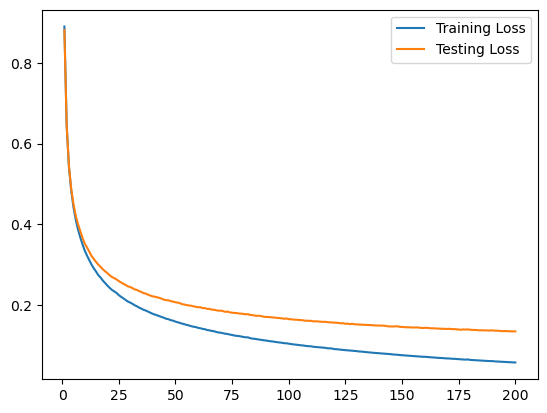

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs+1), train_loss_array)
plt.plot(range(1, epochs+1), test_loss_array)
plt.legend(['Training Loss', "Testing Loss"])
plt.show()

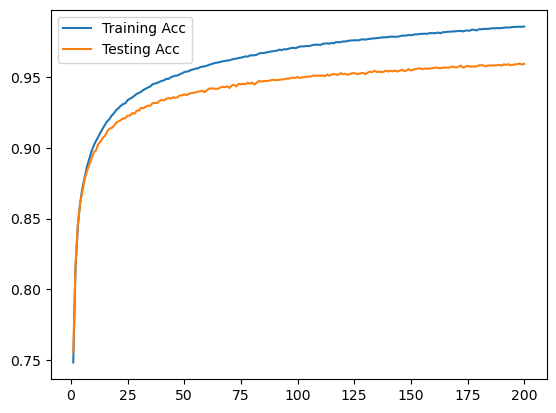

In [19]:
plt.plot(range(1, epochs+1), train_acc_array)
plt.plot(range(1, epochs+1), test_acc_array)
plt.legend(['Training Acc', "Testing Acc"])
plt.show()

### Tensorflow Implementation

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



# Flatten the images and normalize
train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

train_labels = one_hot_encode(train_labels, 10)
test_labels = one_hot_encode(test_labels, 10)

train_images.shape


(60000, 784)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               157000    
                                                                 
 dense_17 (Dense)            (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3740 - accuracy: 0.7146 - val_loss: 0.8080 - val_accuracy: 0.8385
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6646 - accuracy: 0.8518 - val_loss: 0.5381 - val_accuracy: 0.8714
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8748 - val_loss: 0.4436 - val_accuracy: 0.8880
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4366 - accuracy: 0.8856 - val_loss: 0.3956 - val_accuracy: 0.8941
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3987 - accuracy: 0.8922 - val_loss: 0.3674 - val_accuracy: 0.9001
Epoch 6/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8969 - val_loss: 0.3508 - val_accuracy: 0.9030
Epoch 7/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3567 - accuracy: 0.8999 - val_loss: 0.3344 - val_ac

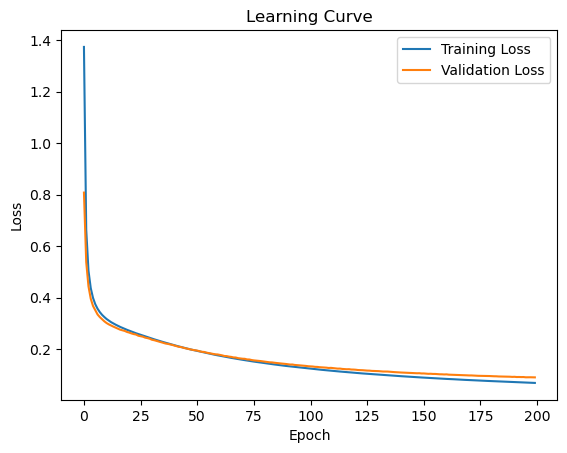

In [32]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()
# Train the model and store history
history = model.fit(train_images, train_labels, epochs=200, batch_size=32, validation_data=(test_images, test_labels))

# Plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()








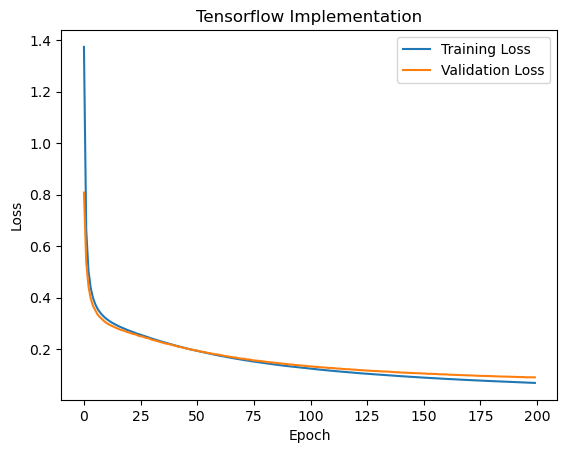

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Tensorflow Implementation')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

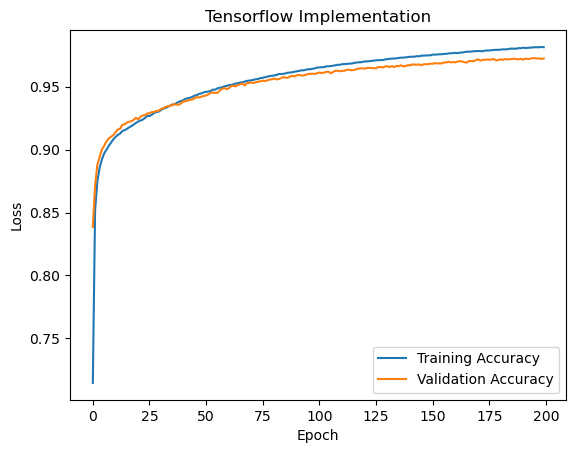

In [34]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Tensorflow Implementation')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()